In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/CoilData.csv")
#df

In [5]:
#Reading Seperate CSV files

dfb4 = "data/SignalExport/400442B4.csv"
dfb5 = "data/SignalExport/400442B5.csv"


def read_single_csv(filename):

    with open(filename) as f:
        data = f.read()

    #Split values in lengthpoints & values
    data = data.split(":;")[1].split("Values")
    length = data[0].split(";")
    width = data[1].split(";")

    #Remove empty values & turn data into floats instead of strings
    length = [x for x in length if x]
    length = [float(x) for x in length]
    width = [x for x in width if x]
    width = [float(x) for x in width]

    
    #Put the data into a dataframe
    df = pd.DataFrame()
    df['length'] = length
    df['width'] = width


    #Remove leading zeros & cut off first measurements 
    df = (df[df['width'] != 0])
    df = df[(df['length'] >= 45) ]
    return df


In [6]:
b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)

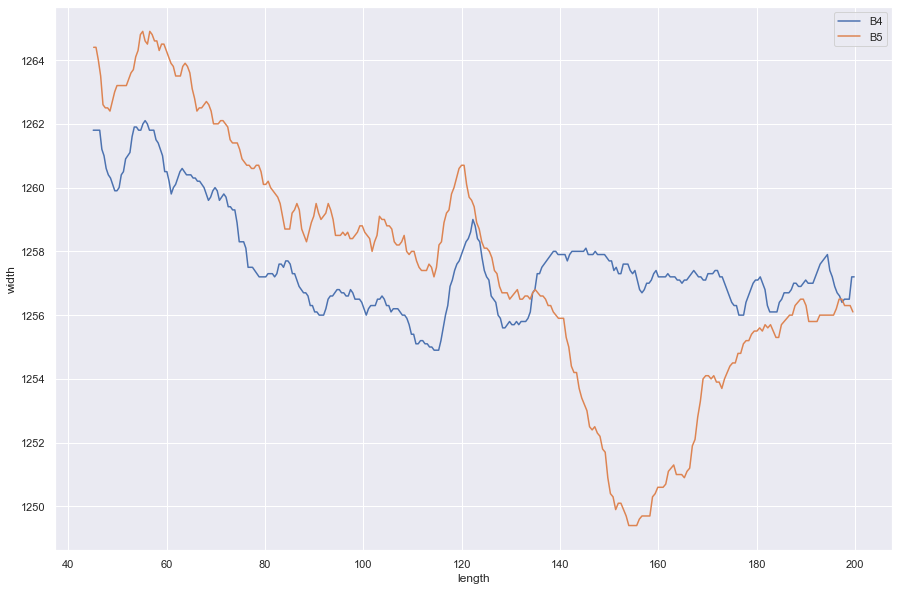

In [7]:
#Plot Data 
sns.set(rc={'figure.figsize':(15,10)})
plt.figure()
sns.lineplot(data=b4,x='length',y='width',label='B4')
g = sns.lineplot(data=b5,x='length',y='width',label='B5')
#g.axhline(b4.quantile(.1).width,c='r')

<Figure size 1080x720 with 0 Axes>

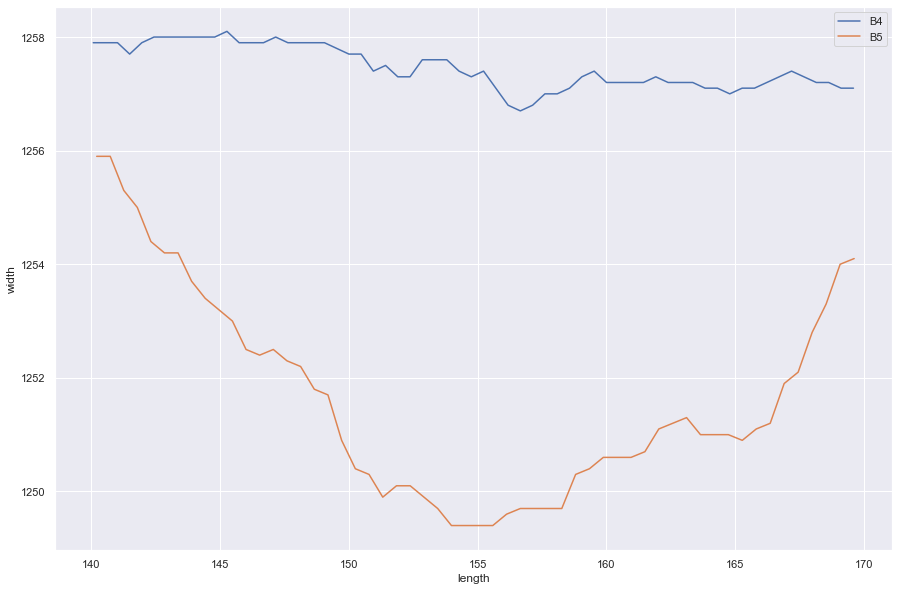

In [8]:
def mini_plot(b4,b5):
    #Create a B4 & B5 plot between 140 - 170
    plt.figure()
    _b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
    _b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
    plt.figure()
    sns.lineplot(data=_b4,x='length',y='width',label='B4')
    sns.lineplot(data=_b5,x='length',y='width',label='B5')
    
mini_plot(b4,b5)

In [9]:
def calculate_constriction(B4,B5):

    #Cut dataframes down to specified range between 140-170
    _B4 = B4[(B4['length'] >= 140) & (B4['length'] <= 170)]
    _B5 = B5[(B5['length'] >= 140) & (B5['length'] <= 170)]
    
    #Prevent SetWithCopyWarning
    _B4 = _B4.copy()
    _B5 = _B5.copy()
    
    #Treshold given my client
    TRESHOLD = 5
    
    #Calculate the difference in witdh between B5 and its nearest point in B4
    _B5['dif'] = _B5.apply(lambda x:(_B4.loc[_B4['length'].sub(x.length).abs().idxmin()][1]) - x.width,axis=1)
    
    #Check if any of the differences exceed the treshold
    _B5['exceed'] = _B5.apply(lambda x: x.dif >= TRESHOLD,axis=1)
    _B5 = _B5[_B5['exceed'] == True]
    
    #As soon as 1 measure point exceeds the treshold we classify it as a constriction
    if(_B5.empty):
        return False
    
    return True

calculate_constriction(b4,b5)   

True

True

<Figure size 1080x720 with 0 Axes>

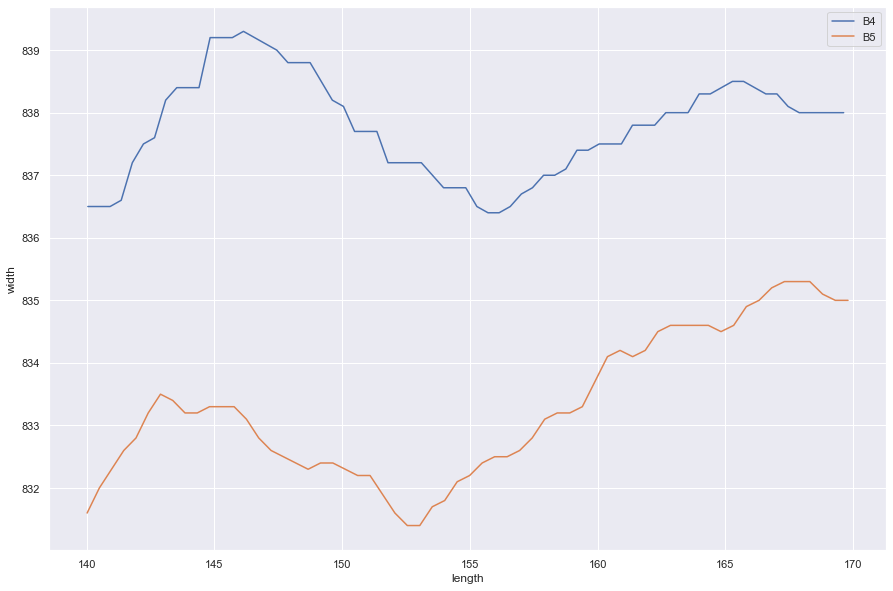

In [10]:
#Calculate single coil
coil_number = 401554
dfb4 = f"data/SignalExport/{coil_number}B4.csv"
dfb5 = f"data/SignalExport/{coil_number}B5.csv"


b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)
mini_plot(b4,b5)
calculate_constriction(b4,b5)   

In [11]:
#Create new constriction column 
df = pd.read_csv("data/CoilData.csv")
coils = df.coil.tolist()
df['constriction'] = -1
df

,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,s,al,ma,b,n,ti,cr,va,mo,constriction
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,143,304,291,1,34,6,302,0,25,-1
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,90,395,384,1,33,12,189,25,7,-1
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,115,476,463,1,20,11,288,0,40,-1
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,98,306,296,1,21,9,253,0,9,-1
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,121,340,329,1,28,8,297,0,23,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57089,20814,1,K371,9781,98,1010.0,1193,883,1.84,20,...,129,303,296,1,30,8,238,1,27,-1
57090,20815,3,K371,9799,98,1010.6,1176,900,1.84,19,...,127,315,308,1,32,8,236,1,25,-1
57091,20816,1,K371,9864,99,1008.6,1187,909,1.84,17,...,120,355,347,1,37,9,230,0,21,-1
57092,20817,3,K371,10039,100,1012.7,1161,893,1.84,21,...,129,306,296,1,27,7,280,0,25,-1


In [12]:
#Create Logfile
import logging
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
logger = logging.getLogger()



In [ ]:
#Loop over all the coil id's
for i in range(len(coils)):
    
    #Try catch to catch malformed csv/missing files
    try:
        
        #Read the csv files
        b4file = f"data/SignalExport/{str(coils[i])}B4.csv"
        b5file = f"data/SignalExport/{str(coils[i])}B5.csv"
        
        b4 = read_single_csv(b4file)
        b5 = read_single_csv(b5file)
        
        #Calculate constriction and add it to the dataframe
        df.at[i,'constriction'] = int(calculate_constriction(b4,b5))
        
    #Log errors
    except Exception as e :
        logger.error(f"{str(coils[i])} - {e}")#,exc_info=True)
    
    print(f"{str(coils[i])}")
    

In [18]:
print(df[df['constriction'] == 1].shape)
print(df[df['constriction'] == 0].shape)
df.shape


(3736, 25)
(52029, 25)


(57094, 25)

In [17]:
df.to_csv("data/Constriction.csv")